In [1]:
# pull in dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

import seaborn as sns


In [4]:
y_2015 = pd.read_csv('Data/All Data/2015.csv')
y_2016 = pd.read_csv('Data/All Data/2016.csv')
y_2017 = pd.read_csv('Data/All Data/2017.csv')
y_2018 = pd.read_csv('Data/All Data/2018.csv')
y_2019 = pd.read_csv('Data/All Data/2019.csv')
y_2020 = pd.read_csv('Data/All Data/2020.csv')
y_2021 = pd.read_csv('Data/All Data/2021.csv')
y_2020



,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Myanmar,Southeast Asia,4.3080,0.042949,4.392180,4.223820,8.680482,0.784407,58.961712,0.895075,0.560664,0.645124,1.972317,0.678091,1.098178,0.495443,0.597479,0.569814,0.187530,0.681463
1,Indonesia,Southeast Asia,5.2856,0.047692,5.379077,5.192123,9.369752,0.808380,62.155849,0.870614,0.519587,0.876296,1.972317,0.891721,1.154801,0.610437,0.568161,0.542647,0.038279,1.479573
2,Haiti,Latin America and Caribbean,3.7208,0.101463,3.919667,3.521932,7.411329,0.593248,55.598625,0.537825,0.400535,0.684767,1.972317,0.284734,0.646671,0.374367,0.169298,0.463910,0.161936,1.619917
3,Gambia,Sub-Saharan Africa,4.7506,0.067164,4.882241,4.618959,7.321815,0.693169,55.012016,0.733163,0.343199,0.690718,1.972317,0.256991,0.882679,0.353248,0.403420,0.425990,0.158094,2.270216
4,Kenya,Sub-Saharan Africa,4.5830,0.067805,4.715898,4.450102,8.029776,0.702652,60.096931,0.829748,0.294682,0.831499,1.972317,0.476413,0.905078,0.536313,0.519181,0.393902,0.067201,1.684905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Azerbaijan,Commonwealth of Independent States,5.1648,0.034197,5.231827,5.097774,9.687727,0.819308,65.508400,0.786824,-0.240255,0.552538,1.972317,0.990273,1.180613,0.731134,0.467735,0.040113,0.247307,1.507633
149,Morocco,Middle East and North Africa,5.0948,0.055650,5.203875,4.985725,8.940313,0.592628,65.896240,0.772072,-0.240377,0.815725,1.972317,0.758622,0.645208,0.745097,0.450054,0.040033,0.077386,2.378402
150,Japan,East Asia,5.8708,0.041392,5.951928,5.789672,10.579689,0.883546,75.000969,0.809961,-0.246910,0.654558,1.972317,1.266724,1.332339,1.072881,0.495466,0.035712,0.181440,1.486200
151,Botswana,Sub-Saharan Africa,3.4789,0.060543,3.597564,3.360236,9.711204,0.779122,58.924454,0.821328,-0.250394,0.777931,1.972317,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241


In [5]:
y_2015['Year']="2015"
y_2016['Year']="2016"
y_2017['Year']="2017"
y_2018['Year']="2018"
y_2019['Year']="2019"
y_2020['Year']="2020"
y_2021['Year']="2021"


In [6]:
#Cleanup column names to be uniform and the same across all DF before merging
y_2015 = y_2015.rename(columns={'Economy (GDP per Capita)':'GDP'})
y_2016 = y_2016.rename(columns={'Economy (GDP per Capita)':'GDP'})
y_2017 = y_2017.rename(columns={'Economy..GDP.per.Capita.':'GDP', 'Happiness.Score':'Happiness Score'})
y_2018 = y_2018.rename(columns={'Country or region':'Country','GDP per capita':'GDP', 'Score': 'Happiness Score'})
y_2019 = y_2019.rename(columns={'Country or region':'Country','GDP per capita': 'GDP',
                               'Score': 'Happiness Score'})
y_2020 = y_2020.rename(columns={'Country name':'Country', 'Explained by: Log GDP per capita': 'GDP',
                                'Generosity':'ng','Explained by: Generosity': 'Generosity','Ladder score': 'Happiness Score'})
y_2021 = y_2021.rename(columns={'Country name':'Country','Explained by: Log GDP per capita': 'GDP', 
                                'Generosity':'ng','Explained by: Generosity': 'Generosity','Ladder score': 'Happiness Score'})


df2015 = y_2015[['Country','Happiness Score','GDP','Generosity','Trust (Government Corruption)']]
df2016 = y_2016[['Country','Happiness Score','GDP','Generosity','Trust (Government Corruption)']]
df2017 = y_2017[['Country','Happiness Score','GDP','Generosity','Trust..Government.Corruption.']]
df2018 = y_2018[['Country','Happiness Score','GDP','Generosity','Perceptions of corruption']]
df2019 = y_2019[['Country','Happiness Score','GDP','Generosity','Perceptions of corruption']]
df2020 = y_2020[['Country','Happiness Score','GDP','Generosity','Perceptions of corruption']]
df2021 = y_2021[['Country','Happiness Score','GDP','Generosity','Perceptions of corruption']]

df2015 = df2015.rename(columns={"Happiness Score":"2015Happiness","GDP":"2015GDP", 
                                "Generosity":"2015Generosity", 'Trust (Government Corruption)': '2015Trust (Government Corruption)'})
df2016 = df2016.rename(columns={"Happiness Score":"2016Happiness","GDP":"2016GDP", 
                                "Generosity":"2016Generosity", 'Trust (Government Corruption)': '2016Trust (Government Corruption)'})
df2017 = df2017.rename(columns={"Happiness Score":"2017Happiness","GDP":"2017GDP", 
                                "Generosity":"2017Generosity", 'Trust..Government.Corruption.': '2017Trust (Government Corruption)'})
df2018 = df2018.rename(columns={"Happiness Score":"2018Happiness","GDP":"2018GDP", 
                                "Generosity":"2018Generosity", 'Perceptions of corruption': '2018Trust (Government Corruption)'})
df2019 = df2019.rename(columns={"Happiness Score":"2019Happiness","GDP":"2019GDP", 
                                "Generosity":"2019Generosity", 'Perceptions of corruption': '2019Trust (Government Corruption)'})
df2020 = df2020.rename(columns={"Happiness Score":"2020Happiness","GDP":"2020GDP", 
                                "Generosity":"2020Generosity", 'Perceptions of corruption': '2020Trust (Government Corruption)'})
df2021 = df2021.rename(columns={"Happiness Score":"2021Happiness","GDP":"2021GDP", 
                                "Generosity":"2021Generosity", 'Perceptions of corruption': '2021Trust (Government Corruption)'})



In [7]:
#y_2021.sort_values('Happiness Score', ascending=False)

combined_years = pd.merge(df2015, df2016, how='outer', on='Country')
combined_years.head()

combined_years = pd.merge(combined_years, df2017, how='outer', on='Country')
combined_years.head()

combined_years = pd.merge(combined_years, df2018, how='outer', on='Country')
combined_years.head()

combined_years = pd.merge(combined_years, df2019, how='outer', on='Country')
combined_years.head()

combined_years = pd.merge(combined_years, df2021, how='outer', on='Country')
combined_years.head()




In [8]:
combined_years.to_csv(r'sy_HappynessYearsMerged.csv')

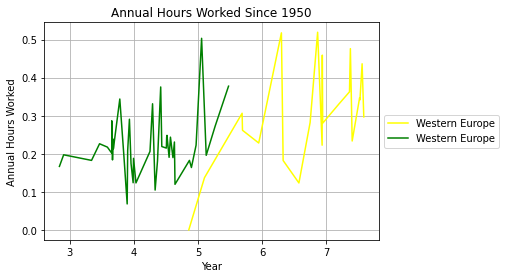

In [10]:
west=plt.plot(y_2015.loc[y_2015['Region']=='Western Europe']['Happiness Score'],y_2015.loc[y_2015['Region']=='Western Europe']['Generosity'],color="yellow",label="Western Europe")
sub=plt.plot(y_2015.loc[y_2015['Region']=='Sub-Saharan Africa']['Happiness Score'],y_2015.loc[y_2015['Region']=='Sub-Saharan Africa']['Generosity'],color="green",label="Western Europe")# titles and labels
plt.title("Annual Hours Worked Since 1950")
plt.xlabel("Year")
plt.ylabel("Annual Hours Worked")
# places legend outside plot
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.grid()
plt.show()


In [ ]:
new_df = combined_years.dropna()
region_column = y_2015[['Country','Region']]
combined_region = new_df.merge(region_column, how = 'left', on = 'Country')
cname = list(combined_region.columns.values)
new_column_list = [cname[0], cname[-1]] + cname[1:-1]
new_combined_region = combined_region[new_column_list]
combined_region

new_combined_region

In [12]:
new_df = combined_years.dropna()
region_column = y_2015[['Country','Region']]
combined_region = new_df.merge(region_column, how = 'left', on = 'Country')
cname = list(combined_region.columns.values)
new_column_list = [cname[0], cname[-1]] + cname[1:-1]
new_combined_region = combined_region[new_column_list]
combined_region

new_combined_region





,Country,Region,2015Happiness,2015GDP,2015Generosity,2015Trust (Government Corruption),2016Happiness,2016GDP,2016Generosity,2016Trust (Government Corruption),...,2018Generosity,2018Trust (Government Corruption),2019Happiness,2019GDP,2019Generosity,2019Trust (Government Corruption),2021Happiness,2021GDP,2021Generosity,2021Trust (Government Corruption)
0,Switzerland,Western Europe,7.587,1.39651,0.29678,0.41978,7.509,1.52733,0.28083,0.41203,...,0.256,0.357,7.480,1.452,0.263,0.343,7.571,1.566,0.204,0.292
1,Iceland,Western Europe,7.561,1.30232,0.43630,0.14145,7.501,1.42666,0.47678,0.14975,...,0.353,0.138,7.494,1.380,0.354,0.118,7.554,1.482,0.293,0.673
2,Denmark,Western Europe,7.527,1.32548,0.34139,0.48357,7.526,1.44178,0.36171,0.44453,...,0.284,0.408,7.600,1.383,0.252,0.410,7.620,1.502,0.208,0.179
3,Norway,Western Europe,7.522,1.45900,0.34699,0.36503,7.498,1.57744,0.37895,0.35776,...,0.286,0.340,7.554,1.488,0.271,0.341,7.392,1.543,0.249,0.270
4,Canada,North America,7.427,1.32629,0.45811,0.32957,7.404,1.44015,0.44834,0.31329,...,0.321,0.291,7.278,1.365,0.285,0.308,7.103,1.447,0.246,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Afghanistan,Southern Asia,3.575,0.31982,0.36510,0.09719,3.360,0.38227,0.31268,0.07112,...,0.191,0.036,3.203,0.350,0.158,0.025,2.523,0.370,0.122,0.924
132,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.22628,0.55191,3.515,0.32846,0.23552,0.50521,...,0.200,0.444,3.334,0.359,0.217,0.411,3.415,0.364,0.227,0.167
133,Benin,Sub-Saharan Africa,3.340,0.28665,0.18260,0.08010,3.484,0.39499,0.20180,0.06681,...,0.163,0.067,4.883,0.393,0.175,0.082,5.045,0.507,0.166,0.661
134,Burundi,Sub-Saharan Africa,2.905,0.01530,0.19727,0.10062,2.905,0.06831,0.20290,0.09419,...,0.149,0.076,3.775,0.046,0.176,0.180,3.775,0.000,0.172,0.607


In [13]:
new_combined_region.to_csv(r'sy_HappynessYearsMerged.csv')